In [1]:
import keras
import tensorflow
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
from keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
data_gen = ImageDataGenerator(rotation_range=25,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="reflect")

In [5]:
# (X_train,y_train),(X_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [6]:
# import os
# y=[]
# x=[]
# src ="/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/"
# labels = os.listdir(src)
# for i,label in enumerate(labels):
#     for image in os.listdir(src+label):
#         try:
#             data = plt.imread(src+label+"/"+image)
#             data = tensorflow.image.resize(data, (224, 224)).numpy().astype('uint8')
#             if(data.shape != (224,224,3)):
#                 print(src+label+"/"+image+" : ignored" )
#                 continue
#             x.append(data)
#             y.append(i)
#         except:
#             print(src+label+"/"+image+" : errone" )

In [7]:
import pickle
# x=np.array(x)
# y=np.array(y)
# with open('/kaggle/working/x_224.pickle', 'wb') as handle:
#     pickle.dump(x, handle)
# with open('/kaggle/working/y_224.pickle', 'wb') as handle:
#     pickle.dump(y, handle)
with open('/kaggle/working/x.pickle', 'rb') as handle:
    x = pickle.load(handle)
with open('/kaggle/working/y.pickle', 'rb') as handle:
    y = pickle.load(handle)

In [8]:
x=np.array(x)
y=np.array(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [11]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
# kmeans.fit(X_train[0])

In [12]:
# import hdbscan
# cluster_labels = clusterer.fit_predict(X_train[0])

In [13]:
# import pandas as pd
# for i in range(X_train.shape[0])[3:10]:
#     dr = []
#     for y in range(X_train[i].shape[0]):
#         for x in range(X_train[i].shape[1]):
#             r,g,b= X_train[i][y][x]
#             dr.append((r,g,b))
#     im0=pd.DataFrame(dr)
#     clusterer = hdbscan.HDBSCAN(min_cluster_size=20,min_samples=70)
#     cluster_labels = clusterer.fit_predict(im0)
#     plt.subplots()
#     plt.imshow(cluster_labels.reshape(X_train[i].shape[0],X_train[i].shape[1]))
#     plt.subplots()
#     plt.imshow(X_train[i])

In [14]:
# Normal Net  0.95%: 

class ConvLayer(keras.layers.Layer):
    
    def __init__(self,n_channels=64,conv_size=(3,3)):
        super().__init__()
        self.conv_size = conv_size
        self.n_channels = n_channels
        self.bt_n = [keras.layers.BatchNormalization(),keras.layers.BatchNormalization(),keras.layers.BatchNormalization()]
        self.z_p = [keras.layers.ZeroPadding2D(),keras.layers.ZeroPadding2D(),keras.layers.ZeroPadding2D()]
        self.c_p = [keras.layers.Conv2D(self.n_channels,self.conv_size,activation="relu"),keras.layers.Conv2D(self.n_channels,self.conv_size,activation="relu"),keras.layers.Conv2D(self.n_channels,self.conv_size,activation="relu")]

    def call(self, inputs):
        x=inputs
        for i in range(3):
            x = self.bt_n[i](x)
            x = self.z_p[i](x)
            x = self.c_p[i](x)
        return x
    def get_config(self):
        config = super().get_config()
        config.update({"n_channels": self.n_channels,"conv_size":self.conv_size})
        return config
        
model_vgg_conv = keras.models.Sequential([
    
    ConvLayer(64,(5,5)),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    
    ConvLayer(128,(3,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    ConvLayer(256,(3,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    ConvLayer(256,(3,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(124,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2,activation="softmax",kernel_regularizer=keras.regularizers.l2(0.01))
])





In [15]:
# Inception Net 92% too , was good to see it perform , without shortcuts yani : 

class OPTConv2D(keras.layers.Layer):
    
    def __init__(self,*args,**kwargs):
        super().__init__()
        
        self.c_0 = keras.layers.Conv2D(*args,**kwargs)
        self.bt_n_0 = keras.layers.BatchNormalization()
        self.rel = keras.layers.ReLU()
        
        
        #  self.drp =  [keras.layers.Dropout(0.15),keras.layers.Dropout(0.15),keras.layers.Dropout(0.15)]
    def call(self, inputs):
        x=inputs
        x = self.c_0(x)
        x = self.bt_n_0(x)
        x = self.rel(x)
        return x
    def get_config(self):
        config = super().get_config()
        return config
        
        
class IncpLayer(keras.layers.Layer):
    
    def __init__(self):
        super().__init__()
        
        self.p_0_1 = keras.layers.AveragePooling2D((2,2))
    
        self.c_0 = keras.layers.Conv2D(16,(1,1),activation="relu",padding="same")
        
        self.c_1_1 = OPTConv2D(32,(1,1),padding="same")
        self.c_1_2 = OPTConv2D(32,(5,5),padding="same")
        self.c_1_3 = OPTConv2D(32,(5,5),padding="same")
        self.p_1_1 = keras.layers.MaxPooling2D((2,2))
        
        self.c_2_1 = OPTConv2D(64,(1,1),padding="same")
        self.c_2_2 = OPTConv2D(128,(3,3),padding="same")
        self.c_2_3 = OPTConv2D(128,(3,3),padding="same")
        self.p_2_1 = keras.layers.MaxPooling2D((2,2))

        self.con = keras.layers.Concatenate()
        
        
        #  self.drp =  [keras.layers.Dropout(0.15),keras.layers.Dropout(0.15),keras.layers.Dropout(0.15)]
    def call(self, inputs):
        x=inputs
        
        x_0 = self.c_0(x)
        x_0 = self.p_0_1(x)

        # New Comp
        x_1 = self.c_1_1(x)
        x_1 = self.c_1_2(x_1)
        x_1 = self.c_1_3(x_1)
        x_1_max = self.p_1_1(x_1)
        
        # New Comp
        x_2 = self.c_2_1(x)
        x_2 = self.c_2_2(x_1)
        x_2 = self.c_2_3(x_1)
        x_2_max = self.p_2_1(x_1)
        # New Comp
    
        mx = self.con([x_0,x_2_max,x_1_max])
        return mx 
    def get_config(self):
        config = super().get_config()
        config.update({"n_channels": self.n_channels,"conv_size":self.conv_size})
        return config
            
model_inception = keras.models.Sequential([
    IncpLayer(),
    IncpLayer(),
    IncpLayer(),
    keras.layers.Flatten(), 
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2,activation="softmax",kernel_regularizer=keras.regularizers.l2(0.01))
])  


In [16]:
# # Mobile Kinda Net + resnet 0.92% bi dazen for the same number of layers but it converged on the 30-35( maybe if i add more layers it is better but needs resnet) 
# # without shotcuts ( resnet ) it became 90% bi dazen but  converged only at the end epochs (45-50)
# # deep lnetwork with resnet and mobilenet gave me 92% in around 60 epochs 

# class DConvLayer(keras.layers.Layer):
    
#     def __init__(self,in_channels=3,n_channels=64,conv_size=(3,3)):
#         super().__init__()
#         self.conv_size = conv_size
#         self.n_channels = n_channels
#         self.in_channels = in_channels
        
        
#         self.ec_p = [keras.layers.Conv2D(self.in_channels*6,(1,1)),keras.layers.Conv2D(self.in_channels*6,(1,1)),keras.layers.Conv2D(self.in_channels*6,(1,1))]
#         self.bt_n_1 = [keras.layers.BatchNormalization(),keras.layers.BatchNormalization(),keras.layers.BatchNormalization()]
#         self.relu_1 = [keras.layers.ReLU(),keras.layers.ReLU(),keras.layers.ReLU()]
        
#         self.c_p = [keras.layers.DepthwiseConv2D(kernel_size=self.conv_size,padding="same"),keras.layers.DepthwiseConv2D(kernel_size=self.conv_size,padding="same"),keras.layers.DepthwiseConv2D(kernel_size=self.conv_size,padding="same")]
#         self.bt_n_2 = [keras.layers.BatchNormalization(),keras.layers.BatchNormalization(),keras.layers.BatchNormalization()]
#         self.relu_2 = [keras.layers.ReLU(),keras.layers.ReLU(),keras.layers.ReLU()]
        
#         self.pc_p = [keras.layers.Conv2D(self.n_channels,(1,1)),keras.layers.Conv2D(self.n_channels,(1,1)),keras.layers.Conv2D(self.n_channels,(1,1))]
#         self.bt_n_3 = [keras.layers.BatchNormalization(),keras.layers.BatchNormalization(),keras.layers.BatchNormalization()]
#         self.add = [keras.layers.Add(),keras.layers.Add(),keras.layers.Add()]
#         self.relu_3 = [keras.layers.ReLU(),keras.layers.ReLU(),keras.layers.ReLU()]
        
#         #  self.drp =  [keras.layers.Dropout(0.15),keras.layers.Dropout(0.15),keras.layers.Dropout(0.15)]
#     def call(self, inputs):
#         x=inputs
        
#         for i in range(3):
#             latest_input = x
#             x = self.ec_p[i](x)
#             x = self.bt_n_1[i](x)
#             x = self.relu_1[i](x)

#             x = self.c_p[i](x)
#             x = self.bt_n_2[i](x)
#             x = self.relu_2[i](x)
            
            
#             x = self.pc_p[i](x)
#             x = self.bt_n_3[i](x)
            
#             if(self.in_channels == self.n_channels):
#                 x = self.add[i]([x,latest_input])
                
#             x = self.relu_3[i](x)
# #             x = self.drp[i](x)
#         return x 
#     def get_config(self):
#         config = super().get_config()
#         config.update({"n_channels": self.n_channels,"conv_size":self.conv_size})
#         return config
        
# # model = keras.models.Sequential([
    
# # #     keras.layers.ZeroPadding2D(),
# # #     keras.layers.Conv2D(16,(3,3),activation="relu",padding="same"),
    
# #     DConvLayer(3,16,(3,3)),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
# #     DConvLayer(16,16,(3,3)),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
# #     DConvLayer(16,32,(3,3)),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
# #     DConvLayer(32,32,(3,3)),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
# #     DConvLayer(32,64,(3,3)),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
# #     DConvLayer(64,64,(3,3)),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
# #     keras.layers.Flatten(), 
# #     keras.layers.BatchNormalization(),
# #     keras.layers.Dense(2,activation="softmax",kernel_regularizer=keras.regularizers.l2(0.01))
# # ])
# model = keras.models.Sequential([
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(32,(3,3),activation="relu"),
#     DConvLayer(3,32,(5,5)),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     DConvLayer(32,32,(3,3)),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),    
#     DConvLayer(32,32,(3,3)),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     DConvLayer(32,32,(3,3)),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers.Flatten(), 
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(128,activation="relu"),
#     keras.layers.Dropout(0.2),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dense(2,activation="softmax",kernel_regularizer=keras.regularizers.l2(0.01))
# ])
            

        
# #     ConvLayer(256,(3,3)),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(128,(3,3),activation="relu"),
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(128,(3,3),activation="relu"),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
# #     keras.layers.BatchNormalization(),
    
    
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(256,(3,3),activation="relu"),
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(256,(3,3),activation="relu"),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
# #     keras.layers.BatchNormalization(),
        
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(512,(3,3),activation="relu"),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
# #     keras.layers.Dropout(0.75),
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(512,(3,3),activation="relu"),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(1024,(3,3),activation="relu"),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(5228,(3,3),activation="relu"),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),

#     # keras.layers.Conv2D(128,(3,3),activation="relu"),
#     # keras.layers.MaxPooling2D(pool_size=(2,2)),


#     # keras.layers.Conv2D(256,(3,3),activation="relu"),
#     # keras.layers.MaxPooling2D(pool_size=(2,2)),

In [17]:
# # First Net
# model = keras.models.Sequential([
    
#     keras.layers.BatchNormalization(),
#     keras.layers.ZeroPadding2D(),
#     keras.layers.Conv2D(64,(5,5),activation="relu"),
    
#     keras.layers.BatchNormalization(),
#     keras.layers.ZeroPadding2D(),
#     keras.layers.Conv2D(64,(5,5),activation="relu"),
    
#     keras.layers.BatchNormalization(),
#     keras.layers.ZeroPadding2D(),
#     keras.layers.Conv2D(64,(5,5),activation="relu"),
    
    
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
#     keras.layers.BatchNormalization(),
#     keras.layers.ZeroPadding2D(),
#     keras.layers.Conv2D(128,(3,3),activation="relu"),

        
#     keras.layers.BatchNormalization(),
#     keras.layers.ZeroPadding2D(),
#     keras.layers.Conv2D(128,(3,3),activation="relu"), 
    

#     keras.layers.BatchNormalization(),
#     keras.layers.ZeroPadding2D(),
#     keras.layers.Conv2D(128,(3,3),activation="relu"),
    
    
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    
#     keras.layers.BatchNormalization(),
#     keras.layers.ZeroPadding2D(),
#     keras.layers.Conv2D(256,(3,3),activation="relu"),

        
#     keras.layers.BatchNormalization(),
#     keras.layers.ZeroPadding2D(),
#     keras.layers.Conv2D(256,(3,3),activation="relu"),
    
    
        
#     keras.layers.BatchNormalization(),
#     keras.layers.ZeroPadding2D(),
#     keras.layers.Conv2D(256,(3,3),activation="relu"),

#     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
#     keras.layers.BatchNormalization(),
#     keras.layers.ZeroPadding2D(),
#     keras.layers.Conv2D(256,(3,3),activation="relu"),
    
#     keras.layers.BatchNormalization(),
#     keras.layers.ZeroPadding2D(),
#     keras.layers.Conv2D(256,(3,3),activation="relu"),
    
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(128,(3,3),activation="relu"),
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(128,(3,3),activation="relu"),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
# #     keras.layers.BatchNormalization(),
    
    
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(256,(3,3),activation="relu"),
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(256,(3,3),activation="relu"),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
# #     keras.layers.BatchNormalization(),
        
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(512,(3,3),activation="relu"),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
# #     keras.layers.Dropout(0.75),
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(512,(3,3),activation="relu"),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(1024,(3,3),activation="relu"),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    
# #     keras.layers.ZeroPadding2D(),
# #     keras.layers.Conv2D(5228,(3,3),activation="relu"),
# #     keras.layers.MaxPooling2D(pool_size=(2,2)),

#     # keras.layers.Conv2D(128,(3,3),activation="relu"),
#     # keras.layers.MaxPooling2D(pool_size=(2,2)),


#     # keras.layers.Conv2D(256,(3,3),activation="relu"),
#     # keras.layers.MaxPooling2D(pool_size=(2,2)),
    
#     keras.layers.BatchNormalization(),
#     keras.layers.Flatten(),
#     keras.layers.Dense(4096,activation="relu"),
#     keras.layers.Dense(512,activation="relu"),
#     keras.layers.Dense(2,activation="softmax",kernel_regularizer=keras.regularizers.l2(0.01))
# ])





In [22]:
def train_model(model):
    compiled = model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
    model.build(X_train.shape)
    print(model.summary())
    keras.utils.plot_model(model,show_shapes=True)
    generated_data = data_gen.flow(x=X_train,y=y_train)
    model.fit(generated_data,epochs=10,batch_size=16,validation_data=(X_test, y_test))
    loss,accuracy=model.evaluate(X_test,y_test)
    loss,accuracy

In [23]:
train_model(model_vgg_conv)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer (ConvLayer)      (18698, 58, 58, 64)       210316    
                                                                 
 max_pooling2d (MaxPooling2D  (18698, 19, 19, 64)      0         
 )                                                               
                                                                 
 conv_layer_1 (ConvLayer)    (18698, 19, 19, 128)      370304    
                                                                 
 max_pooling2d_1 (MaxPooling  (18698, 9, 9, 128)       0         
 2D)                                                             
                                                                 
 conv_layer_2 (ConvLayer)    (18698, 9, 9, 256)        1477888   
                                                                 
 max_pooling2d_2 (MaxPooling  (18698, 4, 4, 256)       0

In [24]:
train_model(model_inception)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 incp_layer (IncpLayer)      (18698, 32, 32, 67)       127360    
                                                                 
 incp_layer_1 (IncpLayer)    (18698, 16, 16, 131)      134528    
                                                                 
 incp_layer_2 (IncpLayer)    (18698, 8, 8, 195)        141696    
                                                                 
 flatten_1 (Flatten)         (18698, 12480)            0         
                                                                 
 batch_normalization_32 (Bat  (18698, 12480)           49920     
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (18698, 128)              1597568   
                                                      

In [25]:
# vgg_model.summary()
# import gc
# del vgg_model
# gc.collect()

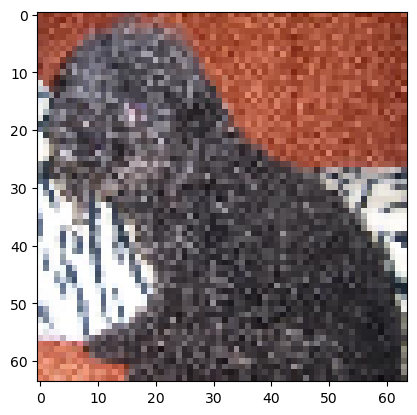

In [32]:
plt.imshow(X_test[6])